In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

# 연금 데이터

In [3]:
pension_w = pd.read_csv('../Data/Pension/pensions2014~2016w.csv')
pension_m = pd.read_csv('../Data/Pension/pensions2014~2016m.csv')
pension_w.shape

(95, 8)

In [11]:
pension_w.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,NPENSION,WOMEN,PC_PRERETEARN,A,2014,53.4,NaN
1,AUS,NPENSION,WOMEN,PC_PRERETEARN,A,2016,38.8,NaN
2,AUT,NPENSION,WOMEN,PC_PRERETEARN,A,2014,91.6,NaN
3,AUT,NPENSION,WOMEN,PC_PRERETEARN,A,2016,91.8,NaN
4,BEL,NPENSION,WOMEN,PC_PRERETEARN,A,2014,60.9,NaN


In [141]:
pension_w.isnull().sum()

LOCATION       0
INDICATOR      0
SUBJECT        0
MEASURE        0
FREQUENCY      0
TIME           0
Value          0
Flag Codes    95
dtype: int64

In [142]:
pension_w = pension_w.drop(columns='Flag Codes')
pension_m = pension_m.drop(columns='Flag Codes')

NPENSION은 net pension replacement rates로 은퇴 전 소득 대비 실질 연금 수준을 뜻함

### 여자 남자 데이터 합침

In [143]:
pension = pd.concat([pension_w, pension_m])

In [144]:
pension.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value'],
      dtype='object')

In [145]:
pension.sample()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
18,GRC,NPENSION,WOMEN,PC_PRERETEARN,A,2014,72.9


In [146]:
pension.dtypes

LOCATION      object
INDICATOR     object
SUBJECT       object
MEASURE       object
FREQUENCY     object
TIME           int64
Value        float64
dtype: object

In [147]:
pension['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BGR', 'CHL', 'CYP', 'EST', 'ISR', 'LVA',
       'LTU', 'MLT', 'ROU', 'SVN', 'ARG', 'BRA', 'CHN', 'IND', 'IDN',
       'RUS', 'SAU', 'ZAF', 'OAVG', 'EU28', 'HRV'], dtype=object)

In [148]:
pension['SUBJECT'].unique()

array(['WOMEN', 'MEN'], dtype=object)

In [149]:
pension['MEASURE'].unique()

array(['PC_PRERETEARN'], dtype=object)

In [150]:
pension['FREQUENCY'].unique()

array(['A'], dtype=object)

In [151]:
pension['TIME'].unique()

array([2014, 2016], dtype=int64)

### TIME이 2014랑 2016 뿐인데 숫자로 되어 있어서 그래프 그릴 때 이상해져서 문자로 바꿈

In [152]:
pension['TIME'] = pension['TIME'].astype(str)

### 나라, 연도를 기준으로 그룹바이해서 남녀 데이터의 평균을 구함

In [153]:
pension_year = pension.groupby(['LOCATION', 'TIME']).mean()[['Value']].reset_index()

In [154]:
pension_year

,LOCATION,TIME,Value
0,ARG,2014,87.40
1,ARG,2016,87.05
2,AUS,2014,55.70
3,AUS,2016,40.70
4,AUT,2014,91.60
5,AUT,2016,91.80
6,BEL,2014,60.90
7,BEL,2016,66.10
8,BGR,2016,88.20
9,BRA,2014,67.25


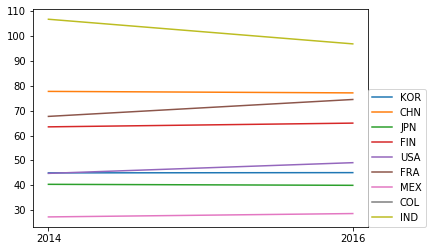

In [155]:
plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'KOR'], label='KOR')
plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'CHN'], label='CHN')

plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'JPN'], label='JPN')
plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'FIN'], label='FIN')
plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'USA'], label='USA')
plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'FRA'], label='FRA')

plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'MEX'], label='MEX')
plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'COL'], label='COL')
plt.plot('TIME', 'Value', data=pension_year[pension_year['LOCATION'] == 'IND'], label='IND')

plt.legend(loc=[1,0])

### 여, 남, 연도를 다 합해 평균을 구함

In [156]:
pension_mean = pension.groupby(['LOCATION']).mean()[['Value']].reset_index()

In [157]:
pension_mean = pension_mean.sort_values(by = ['Value'], ascending=False)
pension_mean.head()
# 내림차순

,LOCATION,Value
21,HRV,129.20
48,TUR,102.40
24,IND,101.80
36,NLD,98.15
41,PRT,92.20


### 나라, 성별를 기준으로 그룹바이해서 년도 데이터의 평균을 구함

In [158]:
pension_sex = pension.groupby(['LOCATION', 'SUBJECT']).mean()[['Value']].reset_index()

In [159]:
pension_sex.head()
# 이번에는 년도를 합쳐 성별을 인덱스로 사용 가능하게 만듦

,LOCATION,SUBJECT,Value
0,ARG,MEN,89.25
1,ARG,WOMEN,85.20
2,AUS,MEN,50.30
3,AUS,WOMEN,46.10
4,AUT,MEN,91.70


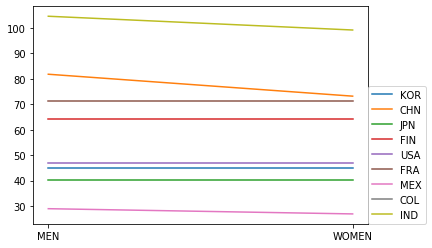

In [160]:
plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'KOR'], label='KOR')
plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'CHN'], label='CHN')

plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'JPN'], label='JPN')
plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'FIN'], label='FIN')
plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'USA'], label='USA')
plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'FRA'], label='FRA')

plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'MEX'], label='MEX')
plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'COL'], label='COL')
plt.plot('SUBJECT', 'Value', data=pension_sex[pension_sex['LOCATION'] == 'IND'], label='IND')

plt.legend(loc=[1,0])

In [161]:
# pension2014 = pension[pension['TIME']=='2014']
# pension2016 = pension[pension['TIME']=='2016']

(array([1., 0., 2., 1., 5., 5., 4., 5., 6., 5., 3., 2., 5., 3., 1., 2., 0.,
        0., 0., 1.]),
 array([ 14.45  ,  20.1875,  25.925 ,  31.6625,  37.4   ,  43.1375,
         48.875 ,  54.6125,  60.35  ,  66.0875,  71.825 ,  77.5625,
         83.3   ,  89.0375,  94.775 , 100.5125, 106.25  , 111.9875,
        117.725 , 123.4625, 129.2   ]),
 <a list of 20 Patch objects>)

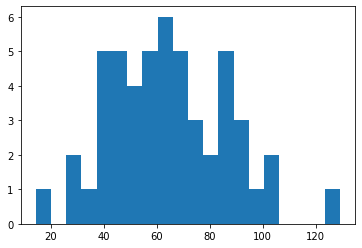

In [162]:
plt.hist(pension_mean['Value'], bins = 20)

In [163]:
pension.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,NPENSION,WOMEN,PC_PRERETEARN,A,2014,53.4
1,AUS,NPENSION,WOMEN,PC_PRERETEARN,A,2016,38.8
2,AUT,NPENSION,WOMEN,PC_PRERETEARN,A,2014,91.6
3,AUT,NPENSION,WOMEN,PC_PRERETEARN,A,2016,91.8
4,BEL,NPENSION,WOMEN,PC_PRERETEARN,A,2014,60.9


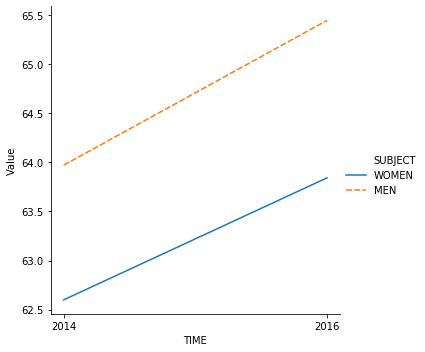

In [164]:
sns.relplot(x = 'TIME', y = 'Value', data=pension, kind = 'line', hue = 'SUBJECT', style = 'SUBJECT', ci = None) 

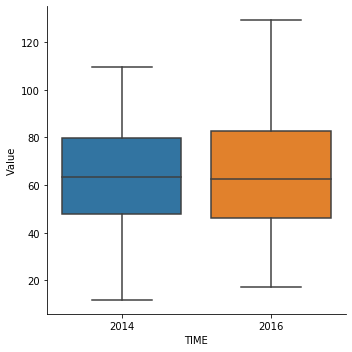

In [165]:
sns.catplot(x = 'TIME', y ='Value', data = pension, kind = 'box') 

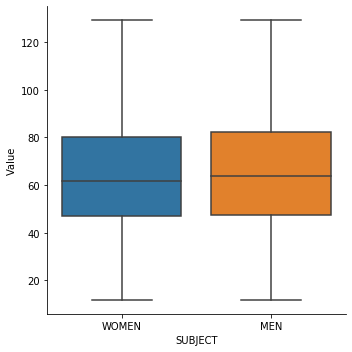

In [166]:
sns.catplot(x = 'SUBJECT', y ='Value', data = pension, kind = 'box') 

# 세금 데이터

Tax on personal income is defined as the taxes levied on the net income (gross income minus allowable tax reliefs) and capital gains of individuals. This indicator relates to government as a whole (all government levels) and is measured in percentage both of GDP and of total taxation.

In [4]:
tax = pd.read_csv('../Data/Tax/tax.csv')
tax.shape

(1593, 8)

In [191]:
tax.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,TAXINCOME,TOT,PC_GDP,A,1965,7.103,NaN
1,AUS,TAXINCOME,TOT,PC_GDP,A,1966,7.079,NaN
2,AUS,TAXINCOME,TOT,PC_GDP,A,1967,7.459,NaN
3,AUS,TAXINCOME,TOT,PC_GDP,A,1968,7.270,NaN
4,AUS,TAXINCOME,TOT,PC_GDP,A,1969,7.749,NaN


In [192]:
tax.isnull().sum()

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    1593
dtype: int64

In [205]:
tax = tax.drop(columns='Flag Codes')

In [194]:
tax.sample()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
1487,OAVG,TAXINCOME,TOT,PC_GDP,A,2001,8.693


In [195]:
tax['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'NLD',
       'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'EST', 'ISR', 'SVN', 'OAVG', 'MEX', 'CHL', 'LVA',
       'LTU'], dtype=object)

In [196]:
tax['INDICATOR'].unique()

array(['TAXINCOME'], dtype=object)

In [197]:
tax['SUBJECT'].unique()

array(['TOT'], dtype=object)

In [198]:
tax['MEASURE'].unique()

array(['PC_GDP'], dtype=object)

In [199]:
tax['FREQUENCY'].unique()

array(['A'], dtype=object)

In [200]:
tax['TIME'].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

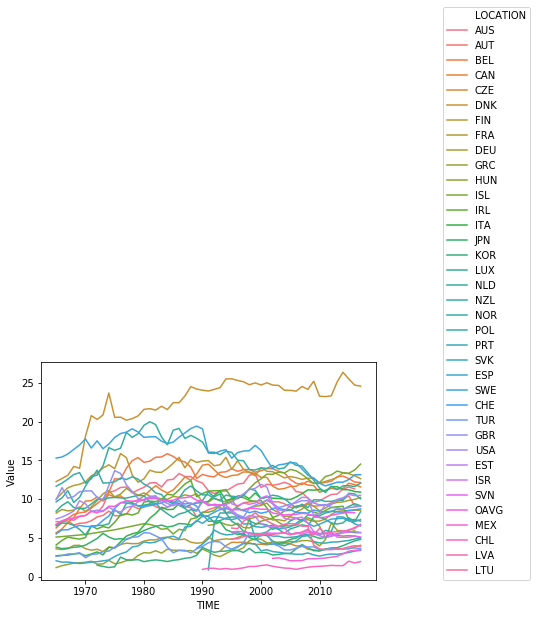

In [206]:
sns.lineplot(x='TIME', y='Value',hue='LOCATION', data=tax)
plt.legend(loc=[1.2,0])

In [212]:
tax.groupby('LOCATION').mean()[['Value']].sort_values(by = 'Value', ascending = False)

,Value
LOCATION,
DNK,22.368849
SWE,15.946019
NZL,14.709226
FIN,13.396774
BEL,12.556962
CAN,11.272075
NOR,10.937849
AUS,10.900288
ISL,10.178439


In [213]:
import plotly.express as px
import plotly.graph_objects as go

In [214]:
px.line(tax, x='TIME', y='Value', color='LOCATION')

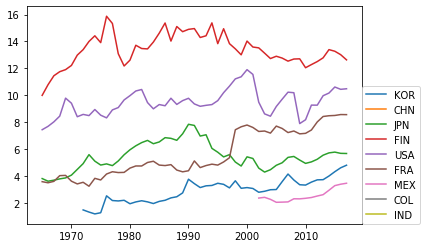

In [215]:
plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'KOR'], label='KOR')
plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'CHN'], label='CHN')

plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'JPN'], label='JPN')
plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'FIN'], label='FIN')
plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'USA'], label='USA')
plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'FRA'], label='FRA')

plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'MEX'], label='MEX')
plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'COL'], label='COL')
plt.plot('TIME', 'Value', data=tax[tax['LOCATION'] == 'IND'], label='IND')

plt.legend(loc=[1,0])

In [189]:
tax[tax['LOCATION']=='ISL']

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
197,ISL,TAXREV,TOT,PC_GDP,A,2000,36.271
198,ISL,TAXREV,TOT,PC_GDP,A,2001,34.474
199,ISL,TAXREV,TOT,PC_GDP,A,2002,34.173
200,ISL,TAXREV,TOT,PC_GDP,A,2003,35.617
201,ISL,TAXREV,TOT,PC_GDP,A,2004,36.598
202,ISL,TAXREV,TOT,PC_GDP,A,2005,39.698
203,ISL,TAXREV,TOT,PC_GDP,A,2006,40.520
204,ISL,TAXREV,TOT,PC_GDP,A,2007,38.938
205,ISL,TAXREV,TOT,PC_GDP,A,2008,35.002
206,ISL,TAXREV,TOT,PC_GDP,A,2009,31.710


# 연금 gross pension replacement rates

In [9]:
gross_pension = pd.read_csv('../Data/Pension/gross pension replacement rates.csv')

In [10]:
gross_pension.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GPENSION,MEN,PC_PRERETEARN,A,2014,44.5,NaN
1,AUS,GPENSION,MEN,PC_PRERETEARN,A,2016,32.2,NaN
2,AUT,GPENSION,MEN,PC_PRERETEARN,A,2014,78.1,NaN
3,AUT,GPENSION,MEN,PC_PRERETEARN,A,2016,78.4,NaN
4,BEL,GPENSION,MEN,PC_PRERETEARN,A,2014,46.6,NaN


In [16]:
pension_gross_1 = gross_pension.groupby(['LOCATION', 'TIME']).mean()[['Value']].reset_index()

In [17]:
pension_gross_1

,LOCATION,TIME,Value
0,ARG,2014,71.6
1,ARG,2016,71.6
2,AUS,2014,44.5
3,AUS,2016,32.2
4,AUT,2014,78.1
5,AUT,2016,78.4
6,BEL,2014,46.6
7,BEL,2016,46.7
8,BGR,2016,69.0
9,BRA,2014,69.5


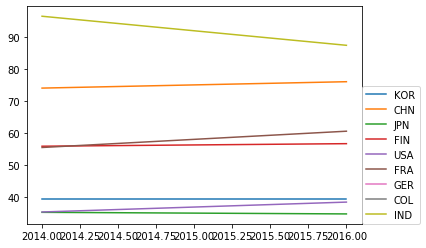

In [19]:
plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'KOR'], label='KOR')
plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'CHN'], label='CHN')

plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'JPN'], label='JPN')
plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'FIN'], label='FIN')
plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'USA'], label='USA')
plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'FRA'], label='FRA')

plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'GER'], label='GER')
plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'COL'], label='COL')
plt.plot('TIME', 'Value', data=pension_gross_1[pension_gross_1['LOCATION'] == 'IND'], label='IND')

plt.legend(loc=[1,0])